# Data Analysis and Mining 2018/2019

## Project 1 - Principal Component Analysis

### Index

> - [a)](#a) Visualizing the data over the chosen features in 2D/3D PC plane using two types of normalization: by range and by standard deviations.
- [b)](#b) Using Single Value Decomposition for the visualization
- [c)](#c) Using a distinct shape and colour the for data points representing a the diabetic and non diabetic Pima women
- [d)](#d) Graphical presentation of the “quality” of the PC projection of the data
- [e)](#e) Computing and interpreting one hidden factor behind the selected features

### Setup
We will make use of the following Python libraries:

In [113]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")

# Auxiliar libraries
from scipy.stats import zscore

from mpl_toolkits.mplot3d import Axes3D

from plotly.offline import plot
from plotly.graph_objs import *

### Dataset Metadata

The dataset consists of several medical predictor variables and one target variable, Outcome. The predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

0. Pregnancies - Number of times pregnant
1. Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
2. Blood Pressure - Diastolic blood pressure ($mm Hg$)
3. Skin Thickness - Triceps skin fold thickness ($mm$)
4. Insulin - 2-Hour serum insulin ($mu U/ml$)
5. BMI - Body mass index ($Kg/m^2$)
6. Diabetes Pedigree Function - Diabetes pedigree function
7. Age - Age (years)
8. Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0

### Features to be analysed in Principal Component  Analysis:

* Skin thickness
* Insulin
* BMI

### Load dataset

In [114]:
# load the text file
data = np.loadtxt('diabetes.csv', delimiter=',', skiprows=1,)

# Removing patients with missing data
data = data[(data[:,1]!=0)
    & (data[:,2] !=0)
    & (data[:,3] !=0)
    & (data[:,4] !=0)
    & (data[:,5] !=0)]

x1 = np.reshape(data[:,3],(data[:,3].shape[0],1)) # Skin Thickness
x2 = np.reshape(data[:,4],(data[:,4].shape[0],1)) # Insulin
x3 = np.reshape(data[:,5],(data[:,5].shape[0],1)) # BMI

labels = data[:,-1]
labels = pd.Series(labels)

df = np.concatenate((x1,x2,x3),axis=1)
print(df.shape)

(392, 3)


#### Z-Score and Range Normalization

In [115]:
### Std norm
data_s = pd.DataFrame(df)
data_s = data_s.apply(zscore)
print(data_s[:5],"\n\n")

### Range normalization 
data_range = pd.DataFrame(df)
data_range = (data_range - data_range.mean())/(data_range.max()-data_range.min())
print(data_range[:5],"\n\n")

# Trick to get (n, 1) shape
x1_s, x2_s, x3_s = data_s[[0]], data_s[[1]], data_s[[2]]
x1_range, x2_range, x3_range = data_range[[0]], data_range[[1]], data_range[[2]]

          0         1         2
0 -0.585110 -0.522842 -0.710421
1  0.557421  0.100631  1.426730
2  0.271788 -0.573394 -0.297238
3  1.509530  3.260122 -0.368477
4 -0.585110  5.812990 -0.425468 


          0         1         2
0 -0.109739 -0.074587 -0.101968
1  0.104546  0.014356  0.204781
2  0.050975 -0.081798 -0.042663
3  0.283118  0.465077 -0.052888
4 -0.109739  0.829259 -0.061068 




<a id='a'></a>

## Visualizing the data over the chosen features in 2D/3D PC plane using two types of normalization: by range and by standard deviations

##### Data visualization in 2D

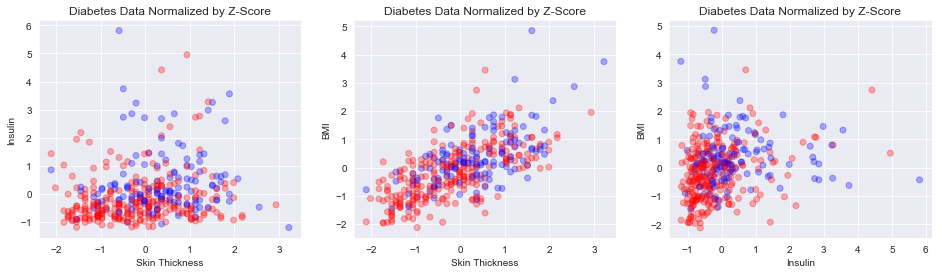

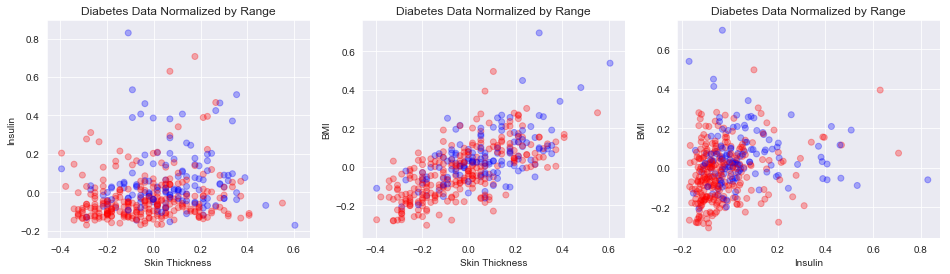

In [116]:
### ZSCORE NORMALISED DATA
colors_palette = {0: "r", 1: "b"}
colors = [colors_palette[c] for c in labels] 

fig, [ax1,ax2,ax3] = plt.subplots(ncols=3, figsize=(16,4))

sns.regplot(x=x1_s,
            y=x2_s,
            fit_reg=False,
            scatter_kws={'alpha':0.3,'color':colors}, ax=ax1)
ax1.set(xlabel='Skin Thickness', 
       ylabel='Insulin',
       title='Diabetes Data Normalized by Z-Score');

sns.regplot(x=x1_s,
            y=x3_s,
            fit_reg=False,
            scatter_kws={'alpha':0.3,'color':colors}, ax=ax2)
ax2.set(xlabel='Skin Thickness', 
       ylabel='BMI',
       title='Diabetes Data Normalized by Z-Score');


sns.regplot(x=x2_s,
            y=x3_s,
            fit_reg=False,
            scatter_kws={'alpha':0.3,'color':colors}, ax=ax3)
ax3.set(xlabel='Insulin', 
       ylabel='BMI',
       title='Diabetes Data Normalized by Z-Score');
plt.savefig('Images/PCA 2D Visualization Z-Score.png',dpi=300)

### RANGE NORMALISED DATA

fig2, [bx1,bx2,bx3] = plt.subplots(ncols=3, figsize=(16,4))

sns.regplot(x=x1_range,
            y=x2_range,
            fit_reg=False,
            scatter_kws={'alpha':0.3,'color':colors}, ax=bx1)
bx1.set(xlabel='Skin Thickness', 
       ylabel='Insulin',
       title='Diabetes Data Normalized by Range');

sns.regplot(x=x1_range,
            y=x3_range,
            fit_reg=False,
            scatter_kws={'alpha':0.3,'color':colors}, ax=bx2)
bx2.set(xlabel='Skin Thickness', 
       ylabel='BMI',
       title='Diabetes Data Normalized by Range');


sns.regplot(x=x2_range,
            y=x3_range,
            fit_reg=False,
            scatter_kws={'alpha':0.3,'color':colors}, ax=bx3)
bx3.set(xlabel='Insulin', 
       ylabel='BMI',
       title='Diabetes Data Normalized by Range');
plt.savefig('Images/PCA 2D Visualization Range.png',dpi=300)

##### Data visualization in 3D

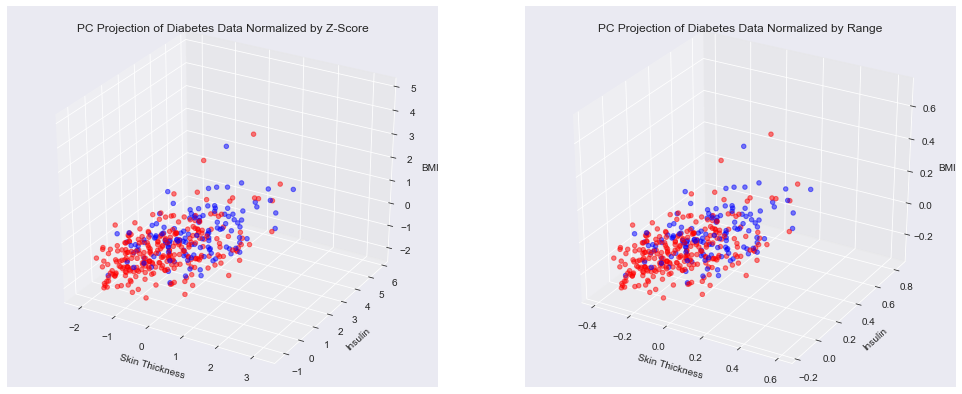

In [117]:
fig = plt.figure(figsize=(17,7))

ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(x1_s, 
           x2_s,
           x3_s,
           c=colors,
           alpha=.5)
ax.set_xlabel('Skin Thickness')
ax.set_ylabel('Insulin')
ax.set_zlabel('BMI')
ax.set_title('PC Projection of Diabetes Data Normalized by Z-Score');

bx = fig.add_subplot(1, 2, 2, projection='3d')


bx.scatter(x1_range, 
           x2_range,
           x3_range,
           c=colors,
           alpha=.5)
bx.set_xlabel('Skin Thickness')
bx.set_ylabel('Insulin')
bx.set_zlabel('BMI')
bx.set_title('PC Projection of Diabetes Data Normalized by Range');
plt.savefig('Images/PCA 3D Visualization.png',dpi=300)

<a id='b'></a>

## Using Single Value Decomposition for the visualization

#### SVD Visualization with Range  Standartization

In [118]:
u, s, vh = np.linalg.svd(data_range, 
                         full_matrices=True) 
print(u.shape)

(392, 392)


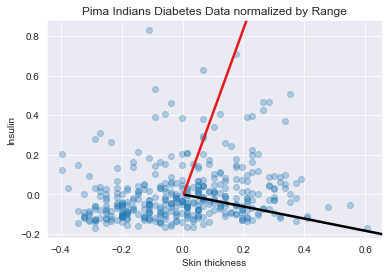

In [119]:
ax = sns.regplot(x=data_range[0],
                y=data_range[1],
                fit_reg=False,
                scatter_kws={'alpha':0.3})

# Draw the Unit EigenVectors
plt.quiver(0, 0, vh[0,0],vh[1,0], scale_units='xy', angles='xy', scale=1, color = 'k')
plt.quiver(0, 0, vh[0,1],vh[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax.set(xlabel='Skin thickness', 
       ylabel='Insulin',
       title='Pima Indians Diabetes Data normalized by Range');

In [120]:
project_data_featureloading = np.dot(data_range, vh.T) # Transpose feature loadings 'vh'
v_norm = np.dot(vh.T,vh)

In [121]:
Us_eig = np.dot(u[:,0:3], np.diag(s)) 

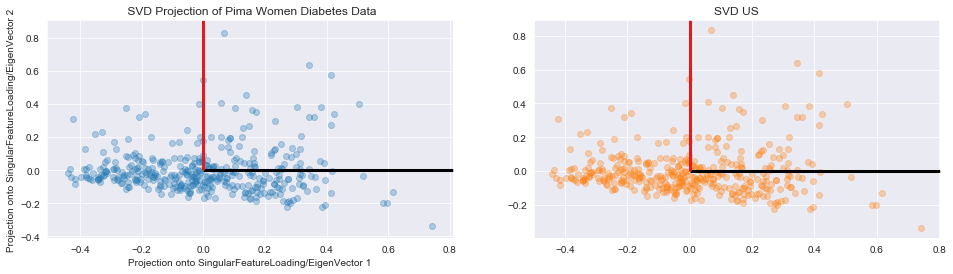

In [122]:
fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))

sns.regplot(x= project_data_featureloading[:,0],
            y= project_data_featureloading[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3},ax=ax1)
ax1.quiver(0, 0, v_norm[0,0],v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = 'k')
ax1.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax1.set(xlabel='Projection onto SingularFeatureLoading/EigenVector 1', 
       ylabel='Projection onto SingularFeatureLoading/EigenVector 2',
       title=' SVD Projection of Pima Women Diabetes Data');

sns.regplot(x=Us_eig[:,0],
            y=Us_eig[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3},ax=ax2)
ax2.quiver(0, 0, v_norm[0,0],v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = 'k')
ax2.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax2.set(xlabel='', 
       ylabel='',
       title='SVD US')
plt.savefig('Images/SVD Visualization Range.png',dpi=300)

##### SVD Visualization with Z-Score  Standartization

In [123]:
u, s, vh = np.linalg.svd(data_s, 
                         full_matrices=True) 
print(u.shape)

(392, 392)


In [124]:
Us_eig = np.dot(u[:,0:3], np.diag(s)) 

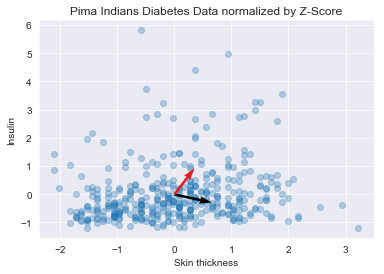

In [125]:
ax = sns.regplot(x=data_s[0],
            y=data_s[1],
            fit_reg=False,
            scatter_kws={'alpha':0.3})

# Draw the Unit EigenVectors
plt.quiver(0, 0, vh[0,0],vh[1,0], scale_units='xy', angles='xy', scale=1, color ='k')
plt.quiver(0, 0, vh[0,1],vh[1,1], scale_units='xy', angles='xy', scale=1, color ='#e41a1c')
ax.set(xlabel='Skin thickness', 
       ylabel='Insulin',
       title='Pima Indians Diabetes Data normalized by Z-Score');

In [126]:
project_data_featureloading = np.dot(data_s, vh.T) # Transpose feature loadings 'vh'
v_norm = np.dot(vh.T,vh)

In [127]:
Us_eig = np.dot(u[:,0:3], np.diag(s)) 

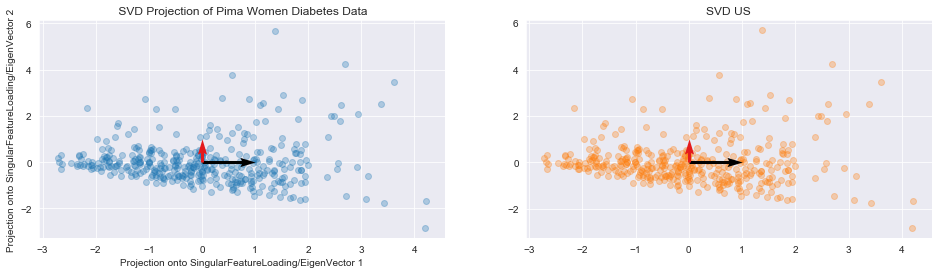

In [128]:
fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))

sns.regplot(x= project_data_featureloading[:,0],
            y= project_data_featureloading[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3},ax=ax1)
ax1.quiver(0, 0, v_norm[0,0],v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = 'k')
ax1.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax1.set(xlabel='Projection onto SingularFeatureLoading/EigenVector 1', 
       ylabel='Projection onto SingularFeatureLoading/EigenVector 2',
       title=' SVD Projection of Pima Women Diabetes Data');

sns.regplot(x=Us_eig[:,0],
            y=Us_eig[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3},ax=ax2)
ax2.quiver(0, 0, v_norm[0,0],v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = 'k')
ax2.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax2.set(xlabel='', 
       ylabel='',
       title='SVD US')
plt.savefig('Images/SVD Visualization Z-Score.png',dpi=300)

The z-score should be better, since it satisfies the “equality principle”

<a id='c'></a>

## Using a distinct shape and colour the for data points representing a the diabetic and non diabetic Pima women

In [129]:
x_values=np.column_stack((x1,x2,x3))

#Normalize data by Z-Score
means = x_values.mean(axis=0)
stds = np.std(x_values,axis=0)
    
x_norm = (x_values - means)/stds

In [130]:
## Covariance matrix of the normalized dataset
covmatrix = np.cov(x_norm.T)

## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered
e, v = np.linalg.eig(covmatrix)

# order descendingly by largest eigenvalue
order = np.argsort((np.argsort(e) * -1))
e = e[order]
v = v[:,order]

print('Eigenvectors \n%s' %e)
print('\nEigenvalues \n%s' %v)

Eigenvectors 
[0.33488028 1.77704073 0.89575162]

Eigenvalues 
[[-0.69817007 -0.65681888  0.28486403]
 [-0.05173597 -0.35056566 -0.93510807]
 [ 0.71406019 -0.66760218  0.21077329]]


In [131]:
# By SVD
projected_x= np.dot(x_norm,vh.T)
v_norm= np.dot(vh.T, vh)

names = ["SVD-PC_"+str(x+1) for x in range(2)]
names.append('target')
ds_svd = pd.DataFrame(data=np.c_[projected_x[:,0:2], labels], 
                      columns=names)
ds_svd['target'] = ds_svd['target'].astype(int)

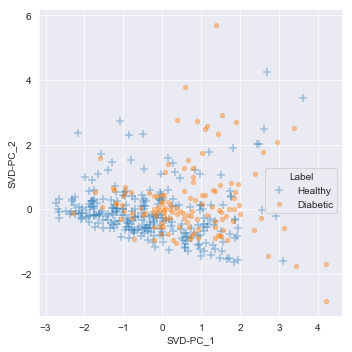

In [132]:
sns.lmplot('SVD-PC_1', 
           'SVD-PC_2', 
           data=ds_svd, 
           hue='target',
           markers=['+','.'],
           fit_reg=False,
           scatter_kws={'alpha':0.4, "s": 70,}, 
           legend_out=False, height=5)
plt.legend(bbox_to_anchor=(1, 0.5), title='Label', labels = ['Healthy','Diabetic'])
plt.savefig('Images/SVD Visualization with a pre‐specified group.png',dpi=300)

We decided to represent this group of objects because it represents the class of our data, composed of Diabetic and non Diabetic Pima Women.

<a id='d'></a>

## Graphical presentation of the “quality” of the PC projection of the data

### Measuring the Quality of PC projections
 Each of the leading eigenvectors of V (from SVD) or PC's defines an "interesting" direction wrt the maximum variability of the Data.
 The ratio of the total variance of the Data captured by an r-projection (typically, r=2, 3) is calculated as the ratio of the sum of square of the main 'r' eigenvalues by the sum of of square of the 'p' ('p' >> 'r') eigenvalues. 

In [133]:
## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered
##e, v = np.linalg.eig(covmatrix)

totVar = sum(e)       #Total variability of the Data
var_exp = [(i / totVar)*100 for i in sorted(e, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,5)],
        y=var_exp,
        name='Exp Var',
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,5)], 
        y=cum_var_exp,
        name='Cum. Exp Var')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
plot(fig)

/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




'file:///Users/diogo/MIEI-FCT/5ºAno/2º Semestre/PAD/Project 1/temp-plot.html'

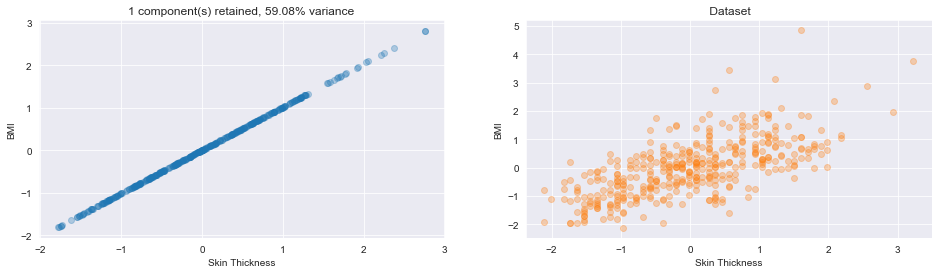

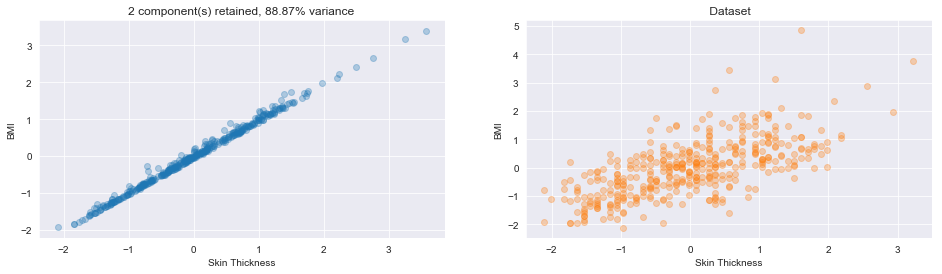

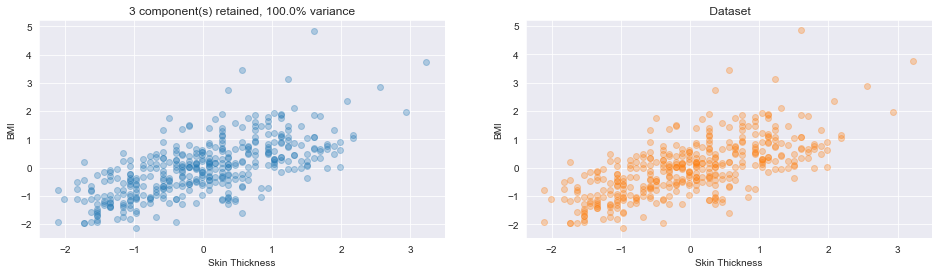

In [134]:
r = x_values.shape[1]
var_explained = np.cumsum(s**2)/np.sum(s**2)*100;

# You can change the features you would like to display, from 0 to 2
f1=0   #Skin Thickness
f2=2   #BMI

approx = []
for n in range(1,r+1):
    approximation = np.dot((u[:,:n] * s[:n]),vh[:n,:]) 
    
    approx.append(approximation)
    
    fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))
    
    sns.regplot(x=approximation[:,f1],
                y=approximation[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax1)
    ax1.set(xlabel= 'Skin Thickness', 
           ylabel= 'BMI',
           title= (str(n) 
                   + ' component(s) retained, ' 
                   + str(round(var_explained[n-1],2)) 
                   + '% variance'))
    

    sns.regplot(x=x_norm[:,f1],
                y=x_norm[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax2)
    ax2.set(xlabel='Skin Thickness', 
           ylabel= 'BMI',
           title=' Dataset')
    plt.savefig('Images/'+str(n)+' Principal Components Retained and Explained Variance.png',dpi=300)

We can see that the quality of the PC projection is good since with 2 components it's possible to cover 88.89% of the variance.

<a id='e'></a>

## Computing and interpreting one hidden factor behind the selected features

In [135]:
x_means = x_values.mean(axis=1)
print('Means',x_means[:5])

u, s, vh = np.linalg.svd(x_values, full_matrices=True)

z = u[:,0:1]
z = -z
print('z',z[:5])

Mu = s[0]
print('Mu',Mu)

c = -vh[0:1]
print('c',c[:5])

Means [ 48.36666667  82.03333333  50.33333333 206.16666667 299.7       ]
z [[0.02509335]
 [0.04440431]
 [0.02398681]
 [0.13753955]
 [0.21219029]]
Mu 3950.0956726181616
c [[0.12440794 0.98240996 0.13925998]]


$$Z = (0.12*SkinThickness+0.98*Insulin+0.13*BMI) * \alpha$$

In [136]:
# Z = (c[0,0]*SkinThickness+c[0,1]*Insulin+c[0,2]*BMI) * alpha
Z = 100
alpha = Z / ((c[0,0]+c[0,1]+c[0,2])*Z)
print('alpha',round(alpha,4))

skin_thickness = c[0,0]*alpha

insulin = c[0,1]*alpha

bmi = c[0,2]*alpha

print('SkinThickness',round(skin_thickness,4),'Insulin',round(insulin,4),'BMI',round(bmi,4))

pc_z = skin_thickness*x_values[:,0:1]+insulin*x_values[:,1:2]+bmi*x_values[:,2:3]
print(pc_z[:5])

alpha 0.8025
SkinThickness 0.0998 Insulin 0.7884 BMI 0.1118
[[ 79.54649193]
 [140.76267513]
 [ 76.03873821]
 [436.00356097]
 [672.64811   ]]


$$Z = 0.09*SkinThickness+0.78*Insulin+0.11*BMI$$

Weight of Skin Thickness and Insulin is greatly increased while Weight of BMI is decreased in comparison to the mean.